In [1]:


#The main aim is to create a fake news detection system that predicts whether a news is fake or not. here we have 3 datasets 1.valid.csv 2.train.csv 3.test.csv

##importing neccessary libraries.
import pandas as pd#for handling data sets
import csv#helps in handling csv files
import numpy as np#used to perform numerical operations and provide meaning full matrices based on data
import nltk#useful for proceesing the data Natural language processing 
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
#above both reduce the words in the dataset into their root based form
from nltk.tokenize import word_tokenize#useful in breaking text into individual tokens
import seaborn as sb# used for creating informative and attractive statistical graphics.we need to create the system by takng first step 1.Data preprocessing.


In [2]:
#reading data files
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
valid=pd.read_csv('valid.csv')


In [3]:
print(train.head())
train.shape

                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True


(10240, 2)

In [4]:
print(test.head())
test.shape

                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan that will cut...   True
4  When asked by a reporter whether hes at the ce...  False


(2551, 2)

In [5]:
print(valid.head())
valid.shape

                                           Statement  Label
0  We have less Americans working now than in the...  FALSE
1  When Obama was sworn into office, he DID NOT u...  FALSE
2  Says Having organizations parading as being so...  FALSE
3     Says nearly half of Oregons children are poor.   TRUE
4  On attacks by Republicans that various program...   TRUE


(2571, 2)

In [6]:
#creating distribution among the datsets
def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')
    

<Axes: xlabel='Label', ylabel='count'>

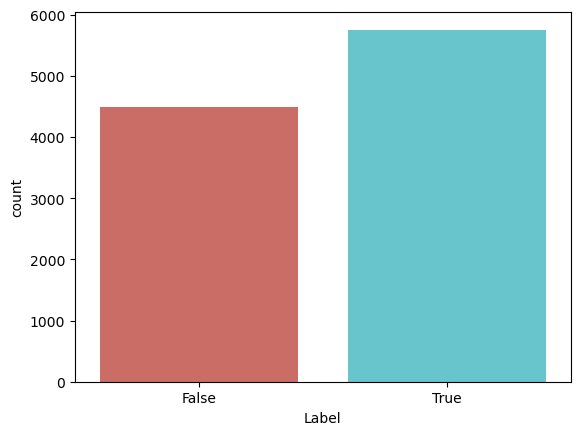

In [7]:
create_distribution(train)

<Axes: xlabel='Label', ylabel='count'>

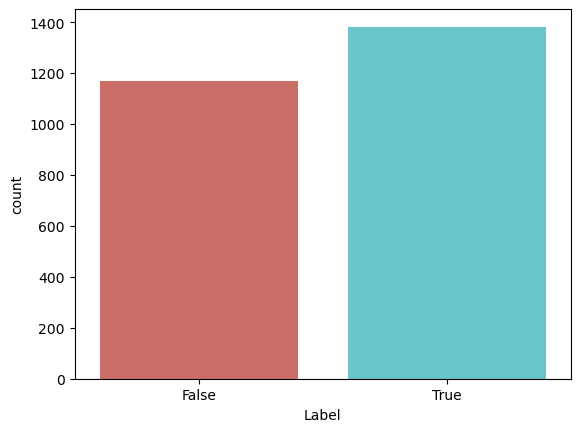

In [8]:
create_distribution(test)

<Axes: xlabel='Label', ylabel='count'>

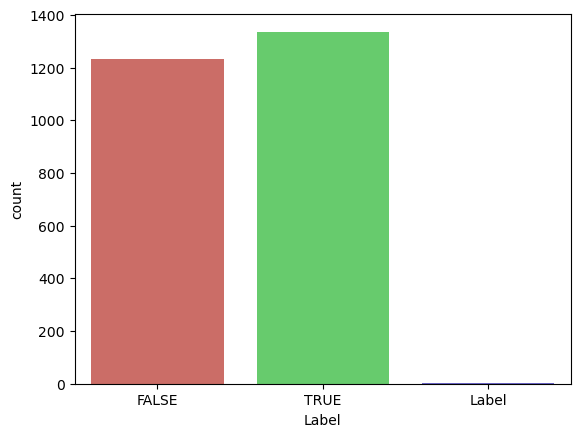

In [9]:
create_distribution(valid)

In [10]:
#checking missing values.
print(train.isnull().sum())
print(train.info())

Statement    0
Label        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
None


In [11]:
print(test.isnull().sum())
print(test.info())

Statement    0
Label        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
None


In [12]:
print(valid.isnull().sum())
print(valid.info())

Statement    0
Label        2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2571 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB
None


In [13]:
#no dataset contain null values so no handling missing values is needed .we can go further.



In [14]:
#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

In [15]:
train.duplicated().sum()




13

In [16]:
test.duplicated().sum()


0

In [17]:
valid.duplicated().sum()

1284

In [18]:
train_news=train.drop_duplicates(keep='first')
test_news=test.drop_duplicates(keep='first')
valid_news=valid.drop_duplicates(keep='first')

In [19]:
train_news.duplicated().sum()

0

In [20]:
valid_news.duplicated().sum()

0

In [21]:
train_news.sample(10)

,Statement,Label
1534,I was one of about a dozen (senators) who vote...,True
2761,Electricity rates are 40 percent higher in sta...,True
2671,Social Security didnt cause the debt crisis. S...,True
9891,Says Debbie Wasserman Schultz has voted for hu...,True
3548,Scott Walker raises nearly 70 percent of his m...,False
2861,My two appointments to the Florida Supreme Cou...,True
9795,"No, I did not (have illegal immigrants working...",False
680,Says Donald Trump wants to deport our Dreamers.,True
4689,Both McCain and Bush favor tax breaks for oil ...,False
5980,President Obamas suggested reduction in spendi...,True


In [22]:
train_news['Label'].value_counts(0)

True     5746
False    4481
Name: Label, dtype: int64

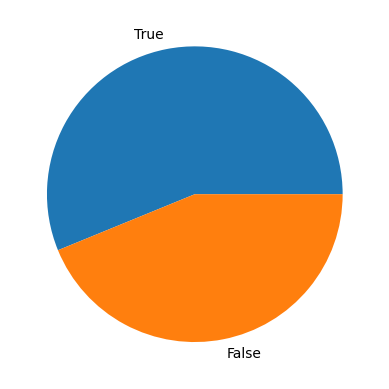

In [23]:
import matplotlib.pyplot as plt
plt.pie(train_news['Label'].value_counts(),labels=['True','False'])
plt.show()

In [24]:
test_news.sample(10)

,Statement,Label
862,John McCain is right on that one. The line-ite...,True
1953,One third of our age group (Millennials) have ...,True
2288,Says Robert Hurt supports the tax loopholes th...,False
2223,The final pitch of Don Larsens perfect game in...,True
942,Says the National Labor Relations Board told B...,False
1584,The Confederate battle flag at the South Carol...,True
2095,Our numbers are going up at the airport,False
1087,Says Adam Hasner gives the wealthy tax breaks ...,False
1450,The number of illegal immigrants in the United...,False
608,"For at least a year now, I have called for two...",True


In [25]:
test_news['Label'].value_counts(0)

True     1382
False    1169
Name: Label, dtype: int64

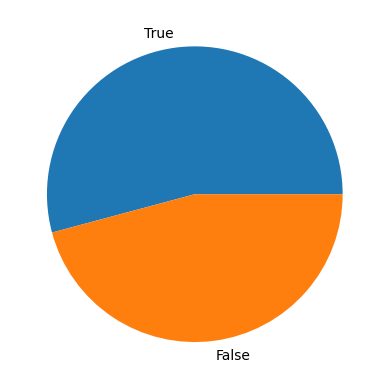

In [26]:
import matplotlib.pyplot as plt
plt.pie(test_news['Label'].value_counts(),labels=['True','False'])
plt.show()

In [27]:
valid_news.sample(10)

,Statement,Label
174,The IRS scandal clearly showed some criminal b...,FALSE
1023,We moved 100 times as many people out of pover...,TRUE
112,Says a Republican hasnt won [an election] for ...,TRUE
628,"Says in Katrina, they approved $60 billion wit...",TRUE
952,Were spending tremendous amounts of money to e...,FALSE
1242,The Obama administration has put out more of t...,TRUE
375,Says Matt Wand has sided with anti-choice acti...,TRUE
876,DNC chair Debbie Wasserman Schultz denied unem...,FALSE
1163,A proposed ban on hollow-point bullets and bul...,TRUE
681,Limberbutt McCubbins (a five-year-old cat) is ...,TRUE


In [28]:
valid_news['Label'].value_counts(10)

TRUE     0.519844
FALSE    0.479377
Label    0.000778
Name: Label, dtype: float64

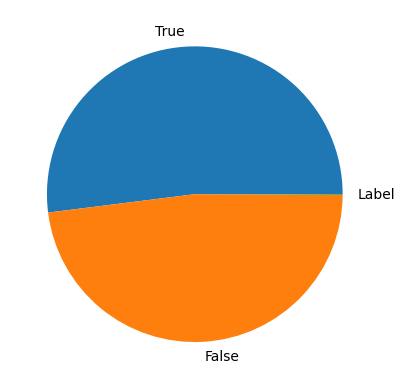

In [29]:
import matplotlib.pyplot as plt
plt.pie(valid_news['Label'].value_counts(),labels=['True','False','Label'])
plt.show()

In [30]:
#Porter stemming is a text normalization technique that aims to reduce words to their base or root form. 
#It is used to simplify the words in a text by removing suffixes.
#In the context of
#natural language processing and machine learning, Porter stemming (or similar stemming algorithms)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
import string

# You can directly use scikit-learn's English stopwords
stopwords = set(ENGLISH_STOP_WORDS)

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize based on whitespace
    text_tokens = text.split()

    # Filter out non-alphanumeric words and remove stopwords
    text_tokens = [word for word in text_tokens if word.isalnum() and word not in stopwords]

    # Apply stemming
    stemmed_tokens = [ps.stem(word) for word in text_tokens]

    return " ".join(stemmed_tokens)

trans_text = transform_text("I'm gonna home and i don't want to Talk roght now.I am Manvitha")
print(trans_text)


gonna home want talk roght manvitha


In [31]:
t1=train_news['Statement'][7]
t1

"I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate."

In [32]:
transform_text(t1)

'person stage work activ just year russ toughest ethic reform'

In [33]:

train_news['trans_text'] = train_news['Statement'].map(transform_text)

train_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_10620\3312561108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_news['trans_text'] = train_news['Statement'].map(transform_text)


,Statement,Label,trans_text
0,Says the Annies List political group supports ...,False,say anni list polit group support abort
1,When did the decline of coal start? It started...,True,did declin coal start natur ga took start begi...
2,"Hillary Clinton agrees with John McCain ""by vo...",True,hillari clinton agre john mccain vote georg bu...
3,Health care reform legislation is likely to ma...,False,health care reform legisl like mandat free sex...
4,The economic turnaround started at the end of ...,True,econom turnaround start end
...,...,...,...
10235,There are a larger number of shark attacks in ...,True,larger number shark attack florida case voter
10236,Democrats have now become the party of the [At...,True,democrat parti metro area
10237,Says an alternative to Social Security that op...,True,say altern social secur oper galveston meant p...
10238,On lifting the U.S. Cuban embargo and allowing...,False,lift cuban embargo allow travel


In [34]:
test_news['trans_text'] = test_news['Statement'].map(transform_text)

test_news

,Statement,Label,trans_text
0,Building a wall on the U.S.-Mexico border will...,True,build wall border liter
1,Wisconsin is on pace to double the number of l...,False,wisconsin pace doubl number layoff
2,Says John McCain has done nothing to help the ...,False,say john mccain help
3,Suzanne Bonamici supports a plan that will cut...,True,suzann bonamici support plan cut choic medicar...
4,When asked by a reporter whether hes at the ce...,False,ask report he center crimin scheme violat camp...
...,...,...,...
2546,"For the first time in more than a decade, impo...",True,time import account half consum
2547,Says Donald Trump has bankrupted his companies...,True,say donald trump bankrupt compani twice time
2548,"John McCain and George Bush have ""absolutely n...",True,john mccain georg bush plan univers health
2549,A new poll shows 62 percent support the presid...,False,new poll show 62 percent support plan reform h...


In [35]:
valid_news['trans_text'] = valid_news['Statement'].map(transform_text)

valid_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_10620\1909317774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_news['trans_text'] = valid_news['Statement'].map(transform_text)


,Statement,Label,trans_text
0,We have less Americans working now than in the...,FALSE,american work
1,"When Obama was sworn into office, he DID NOT u...",FALSE,obama sworn did use holi instead kuran equival...
2,Says Having organizations parading as being so...,FALSE,say have organ parad social welfar organ invol...
3,Says nearly half of Oregons children are poor.,TRUE,say nearli half oregon children
4,On attacks by Republicans that various program...,TRUE,attack republican variou program econom stimul...
...,...,...,...
1282,A new poll shows 62 percent support the presid...,FALSE,new poll show 62 percent support plan reform h...
1283,No one claims the report vindicating New Jerse...,FALSE,claim report vindic new jersey chri christi br...
1284,=======,NaN,
1285,Statement,Label,statement


In [36]:


train_news['num_characters']=train_news['Statement'].apply(len)
train_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_10620\1500424186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_news['num_characters']=train_news['Statement'].apply(len)


,Statement,Label,trans_text,num_characters
0,Says the Annies List political group supports ...,False,say anni list polit group support abort,82
1,When did the decline of coal start? It started...,True,did declin coal start natur ga took start begi...,141
2,"Hillary Clinton agrees with John McCain ""by vo...",True,hillari clinton agre john mccain vote georg bu...,105
3,Health care reform legislation is likely to ma...,False,health care reform legisl like mandat free sex...,78
4,The economic turnaround started at the end of ...,True,econom turnaround start end,54
...,...,...,...,...
10235,There are a larger number of shark attacks in ...,True,larger number shark attack florida case voter,90
10236,Democrats have now become the party of the [At...,True,democrat parti metro area,78
10237,Says an alternative to Social Security that op...,True,say altern social secur oper galveston meant p...,176
10238,On lifting the U.S. Cuban embargo and allowing...,False,lift cuban embargo allow travel,62


In [37]:

test_news['num_characters']=test_news['Statement'].apply(len)
test_news

,Statement,Label,trans_text,num_characters
0,Building a wall on the U.S.-Mexico border will...,True,build wall border liter,68
1,Wisconsin is on pace to double the number of l...,False,wisconsin pace doubl number layoff,63
2,Says John McCain has done nothing to help the ...,False,say john mccain help,51
3,Suzanne Bonamici supports a plan that will cut...,True,suzann bonamici support plan cut choic medicar...,85
4,When asked by a reporter whether hes at the ce...,False,ask report he center crimin scheme violat camp...,127
...,...,...,...,...
2546,"For the first time in more than a decade, impo...",True,time import account half consum,103
2547,Says Donald Trump has bankrupted his companies...,True,say donald trump bankrupt compani twice time,81
2548,"John McCain and George Bush have ""absolutely n...",True,john mccain georg bush plan univers health,79
2549,A new poll shows 62 percent support the presid...,False,new poll show 62 percent support plan reform h...,191


In [38]:

valid_news['num_characters']=valid_news['Statement'].apply(len)
valid_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_10620\913190148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_news['num_characters']=valid_news['Statement'].apply(len)


,Statement,Label,trans_text,num_characters
0,We have less Americans working now than in the...,FALSE,american work,51
1,"When Obama was sworn into office, he DID NOT u...",FALSE,obama sworn did use holi instead kuran equival...,148
2,Says Having organizations parading as being so...,FALSE,say have organ parad social welfar organ invol...,204
3,Says nearly half of Oregons children are poor.,TRUE,say nearli half oregon children,46
4,On attacks by Republicans that various program...,TRUE,attack republican variou program econom stimul...,190
...,...,...,...,...
1282,A new poll shows 62 percent support the presid...,FALSE,new poll show 62 percent support plan reform h...,196
1283,No one claims the report vindicating New Jerse...,FALSE,claim report vindic new jersey chri christi br...,104
1284,=======,NaN,,7
1285,Statement,Label,statement,9


In [39]:
#starting feature selection

#before detecting we need to select the features and extract from the unstructured data
#this reduces the mass of dataset to train and test the data

#importing necessary libraries.

from sklearn.feature_extraction.text import CountVectorizer#essentially work to convert the text into numerical format that machine learning algorthms can work further.
#it returns a matrix each row represents the text document and each column represnts the unique word.
from sklearn.feature_extraction.text import TfidfTransformer#TF-IDF---> Term Frequency-Inverse Document Frequency 
#it is a combination with countvectorizer.
##it transforms the matrix produced by count matrix.
#evalates the importance of a word in the document
from sklearn.feature_extraction.text import TfidfVectorizer
# combines the functionality of both CountVectorizer and TfidfTransformer 
#converts a collection of raw documents to a matrix of TF-IDF features.
from sklearn.pipeline import Pipeline#it is used to train the collection of data and used to predict
import nltk#Natural Language Toolkit (NLTK) is a powerful library for working with human language data. 
import nltk.corpus #This can be useful for tasks like tokenization, stemming, and other natural language processing tasks.
from nltk.tokenize import word_tokenize#breakdown the senence into individual text or word
from gensim.models.word2vec import Word2Vec#Word2Vec is often used to capture semantic relationships between words.


In [40]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)



In [41]:
print(countV)
print(train_count)


CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10226, 10988)	1
  (10226, 7672)	2
  (10226, 11110)	2
  (10226, 5267)	1
  (10226, 7828)	1
  (10226, 7824)	1
  (10226, 1159)	1
  (10226, 12151)	2
  (10226, 6327)	1
  (10226, 6603)	1
  (10226, 11013)	1
  (10226, 11004)	1
  (10226, 3309)	1
  (10226, 12158)	1
  (10226, 11660)	2
  (10226, 799)	1
  (10226, 2568)	1
  (10226, 11622)	1
  (10226, 2549)	1
  (10226, 10660)	1
  (10226, 8996)	1
  (10226, 10918)	1
  (10226, 3989)	1
  (10226, 10594)	1
  (10226, 6853)	1


In [42]:
train_count.shape

(10227, 12196)

In [43]:
print(countV.vocabulary_)

#get feature names
print(countV)


{'says': 9676, 'the': 10988, 'annies': 1044, 'list': 6639, 'political': 8376, 'group': 5115, 'supports': 10709, 'third': 11036, 'trimester': 11296, 'abortions': 615, 'on': 7728, 'demand': 3278, 'when': 11934, 'did': 3434, 'decline': 3185, 'of': 7672, 'coal': 2475, 'start': 10425, 'it': 6052, 'started': 10426, 'natural': 7418, 'gas': 4860, 'took': 11138, 'off': 7674, 'that': 10980, 'to': 11110, 'begin': 1532, 'in': 5687, 'president': 8554, 'george': 4910, 'bushs': 1964, 'administration': 751, 'hillary': 5401, 'clinton': 2444, 'agrees': 856, 'with': 12027, 'john': 6133, 'mccain': 6967, 'by': 1989, 'voting': 11748, 'give': 4954, 'bush': 1962, 'benefit': 1569, 'doubt': 3684, 'iran': 5999, 'health': 5310, 'care': 2096, 'reform': 9099, 'legislation': 6502, 'is': 6014, 'likely': 6605, 'mandate': 6834, 'free': 4735, 'sex': 9923, 'change': 2256, 'surgeries': 10721, 'economic': 3842, 'turnaround': 11351, 'at': 1259, 'end': 3990, 'my': 7374, 'term': 10939, 'chicago': 2313, 'bears': 1506, 'have': 

In [44]:
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)


In [45]:
print(train_tfidf)


  (0, 11296)	0.4088650776892076
  (0, 11036)	0.2747711616813771
  (0, 10988)	0.06790361079615446
  (0, 10709)	0.26723619543429644
  (0, 9676)	0.11063133154130803
  (0, 8376)	0.284759434963261
  (0, 7728)	0.13448618969855597
  (0, 6639)	0.3217629309487554
  (0, 5115)	0.29181516640863553
  (0, 3278)	0.33991221772939945
  (0, 1044)	0.4270143644698516
  (0, 615)	0.2886542076640041
  (1, 11934)	0.30075074829171505
  (1, 11138)	0.18460223726454997
  (1, 11110)	0.07292471732944761
  (1, 10988)	0.05362486034048315
  (1, 10980)	0.10044361137284939
  (1, 10426)	0.45920106787880194
  (1, 10425)	0.2439333942612637
  (1, 8554)	0.1382265854769025
  (1, 7674)	0.19430335555551426
  (1, 7672)	0.07062020334561968
  (1, 7418)	0.25410272049698857
  (1, 6052)	0.12964734829414376
  (1, 5687)	0.06816699122739371
  :	:
  (10226, 12158)	0.1600500003093514
  (10226, 12151)	0.257104379287594
  (10226, 11660)	0.3687782558698652
  (10226, 11622)	0.23405435945831432
  (10226, 11110)	0.12325476242149079
  (10226, 11

In [46]:
print(train_tfidf.shape)

(10227, 12196)


In [47]:
print(train_tfidf.A[:10])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
#stop_words=english-->common stop_words like the,is are..etc are used during the vectorization process.
#ngram range describes up to how much range the vectorization takes place
#use_idf gives to perform inverse document frequency
#smooth_idf --> It's a smoothing technique to prevent potential issues when dealing with corpora where certain terms may not appear in every document.

In [49]:
tfidf_ngram

TfidfVectorizer(ngram_range=(1, 4), stop_words='english')

In [50]:
import string

def simple_tokenize(text):
    # Remove punctuation and split the text into words
    words = text.translate(str.maketrans("", "", string.punctuation)).split()
    return words

def simple_pos_tag(tokens):
    # Assign a simple POS tag based on whether the word ends with "s"
    pos_tags = [('plural' if word.endswith('s') else 'singular') for word in tokens]
    return list(zip(tokens, pos_tags))

# Example text
text = "Manvitha is a good girl"

# Tokenize the text
tokens = simple_tokenize(text)

# POS tagging using simple rules
pos_tags = simple_pos_tag(tokens)

print(pos_tags)


[('Manvitha', 'singular'), ('is', 'plural'), ('a', 'singular'), ('good', 'singular'), ('girl', 'singular')]


In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
tfidf=TfidfVectorizer(max_features=3000)

In [52]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [53]:

x = tfidf.fit_transform(train_news['trans_text']).toarray()

In [54]:
x.shape

(10227, 3000)

In [55]:
y=train_news['Statement'].values

In [56]:
y.shape

(10227,)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
gnb.fit(x_train,y_train)


GaussianNB()

In [ ]:

y_pred1=gnb.predict(x_test)


In [ ]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))